In [3]:
!pip install matplotlib
!pip install scipy
!pip install qq-training-wheels auquan_toolbox --upgrade

In [4]:
# Import a Kalman filter and other useful libraries
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import poly1d
from datetime import datetime
import csv

In [8]:
# Load pricing data for a security
df = pd.read_csv('data/IFNNY.csv')
x = df['Adj Close']

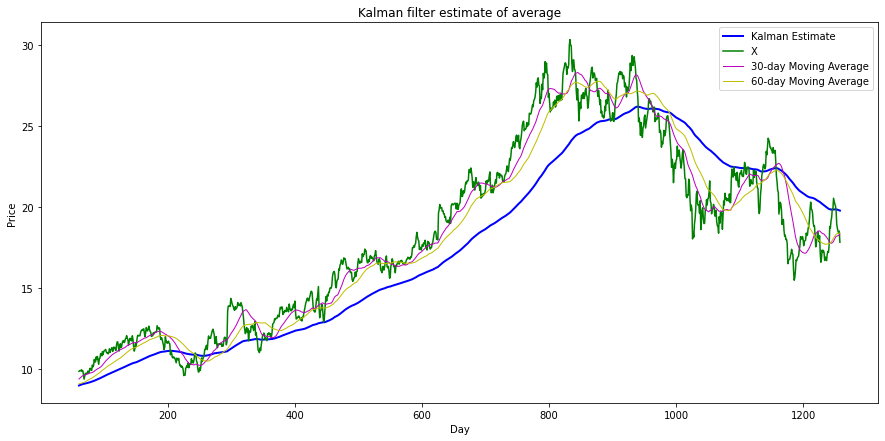

In [12]:
# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.0001)

mean, cov = kf.filter(x.values)
mean = pd.Series(mean.flatten(), index=x.index)

# Compute the rolling mean with various lookback windows
mean30 = x.rolling(window = 30).mean()
mean60 = x.rolling(window = 60).mean()

# Plot original data and estimated mean
plt.figure(figsize=(15,7))
plt.plot(mean[60:], '-b', lw=2, )
plt.plot(x[60:],'-g',lw=1.5)
plt.plot(mean30[60:], 'm', lw=1)
plt.plot(mean60[60:], 'y', lw=1)
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman Estimate', 'X', '30-day Moving Average', '60-day Moving Average'])
plt.xlabel('Day')
plt.ylabel('Price');